In [3]:
install.packages("tm")
install.packages("slam")
load("data/mymovies.Rdata")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [4]:
library(tm)
library(slam)
x <- subset(mymovies, !is.na(BoxOffice))
x$txt <- tolower(paste(x$Plot, x$tomatoConsensus, sep=" "))
xcorpus <- Corpus(VectorSource(x$txt))
mydtm <- DocumentTermMatrix(xcorpus)
dim(mydtm)

[1]  1568 18755

In [5]:
mydtm <- mydtm[, col_sums(mydtm) > 5]
dim(mydtm)

[1] 1568 4228

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-5

Loading required package: lattice
Loading required package: ggplot2

Attaching package: ‘ggplot2’

The following object is masked from ‘package:NLP’:

    annotate



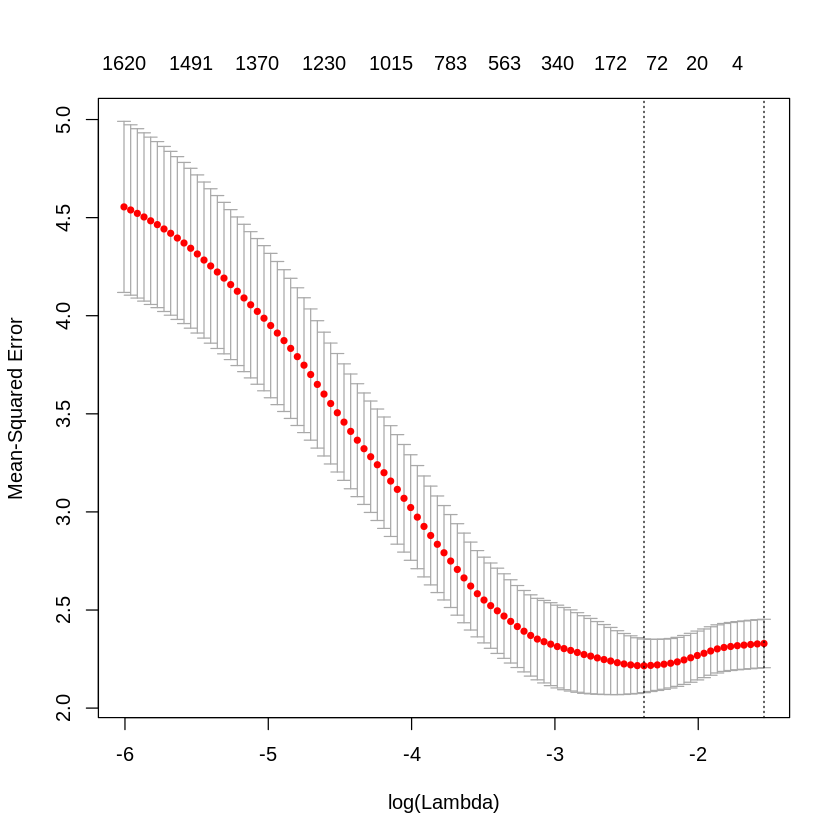

In [7]:
library(glmnet)
library(caret)
#hist(x£BoxOffice, col = "lightblue", breaks = 30)
mymodel <- cv.glmnet(y = log(x$BoxOffice), 
                     x = as.matrix(mydtm),
                     family = "gaussian",
                     nfolds = 10, alpha = 1)
plot(mymodel)

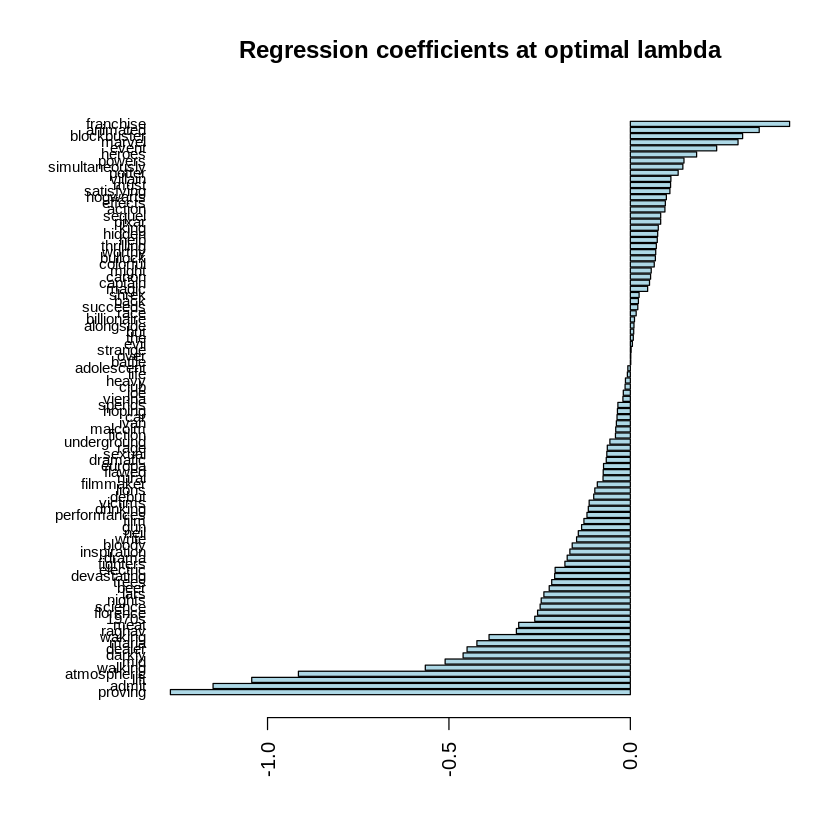

In [8]:
## Extract relevant predictive words
relevant <- predict(mymodel, s="lambda.min", type = "coefficients")[, 1]
relevant <- relevant[relevant != 0]
relevant <- sort(relevant)
relevant <- relevant[setdiff(names(relevant), "(Intercept)")]
## Plot relevant predictive words
par(las = 2, mar=c(5, 7, 4, 2) + 0.1)
barplot(relevant, horiz=TRUE, cex.names = 0.75, col = "lightblue", 
    main = "Regression coefficients at optimal lambda")

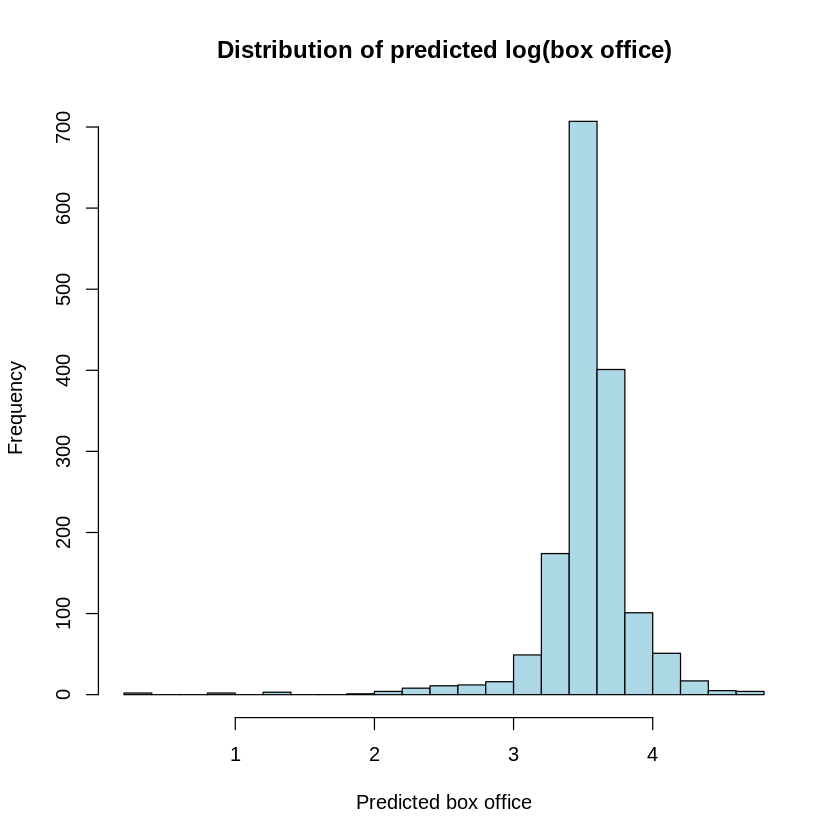

In [9]:
## Use the model to predict based on an existing Document/Term matrix
x$boxoffice.estimate <- predict(mymodel, newx = as.matrix(mydtm), s="lambda.min", type = "response")
hist(x$boxoffice.estimate, breaks = 30, col = "lightblue", 
     xlab = "Predicted box office", main = "Distribution of predicted log(box office)")

In [10]:
postResample(x$boxoffice.estimate, log(x$BoxOffice))

RMSE  Rsquared       MAE 
1.3609029 0.3316804 1.0152648

In [ ]:
# exercise 1: Predict the sentiment score of the movie feedback based on the words in the plot 

In [ ]:
# exercise 2: Predict the imdb rating based on the movie feedback 

In [ ]:
# exercise 3: Predict the rotten tomato rating based on the movie feedback

In [ ]:
# exercise 4: Can you predict the airbnb hotel price based on the customer feedback